In [104]:
import tensorflow  as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

In [106]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [108]:
X_train[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

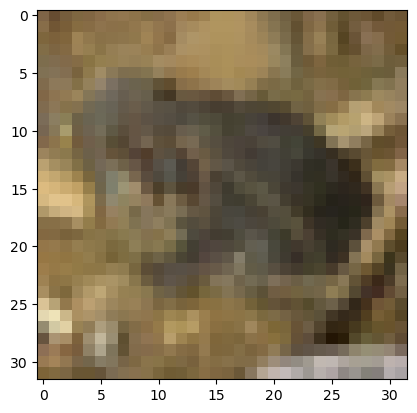

In [8]:
plt.imshow(X_train[23])

In [10]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])

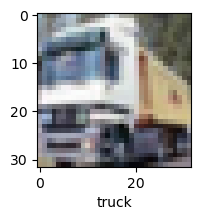

In [18]:
plot_sample(X_train, Y_train,1)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [279]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [281]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [283]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0737 - loss: 49.5391


[49.893062591552734, 0.07029999792575836]

In [285]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3324 - loss: 1.9666
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5195 - loss: 1.3533
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5962 - loss: 1.1459
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6364 - loss: 1.0382
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6720 - loss: 0.9477
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6902 - loss: 0.8874
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7092 - loss: 0.8315
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7308 - loss: 0.7649
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7473 - loss: 0.7222
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7564 - loss: 0.6944


In [287]:
Pre = cnn.predict(X_test)
Pre[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([6.6518762e-05, 7.0351351e-05, 1.1768002e-03, 7.7205378e-01,
       4.4185342e-04, 2.2134766e-01, 3.3939262e-03, 4.1688039e-04,
       8.0435339e-04, 2.2790296e-04], dtype=float32)

In [289]:
Y1 = [np.argmax(element) for element in Pre]# find the index with greatest value
Y1[0]# the index with the greatest value is 3(index 3)

3

In [291]:
Y_test[0]

array([3], dtype=uint8)

In [293]:
classes[Y1[0]]

'cat'

In [295]:
classes[int(Y_test[0])]

/var/folders/79/jzlqc1gn2vzb97nsjw_fdj280000gn/T/ipykernel_21812/588293042.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(Y_test[0])]


'cat'

In [297]:
count = 0
for i in range(100):
    if Y1[i] != Y_test[i][0]:
        count +=1
        print(f"Misclassified: Index {i}, Predicted: {classes[Y1[i]]}, Actual: {classes[Y_test[i][0]]} ",count)

Misclassified: Index 9, Predicted: truck, Actual: automobile  1
Misclassified: Index 10, Predicted: deer, Actual: airplane  2
Misclassified: Index 12, Predicted: deer, Actual: dog  3
Misclassified: Index 15, Predicted: frog, Actual: ship  4
Misclassified: Index 24, Predicted: deer, Actual: dog  5
Misclassified: Index 25, Predicted: cat, Actual: bird  6
Misclassified: Index 35, Predicted: frog, Actual: bird  7
Misclassified: Index 36, Predicted: horse, Actual: deer  8
Misclassified: Index 46, Predicted: horse, Actual: cat  9
Misclassified: Index 49, Predicted: bird, Actual: frog  10
Misclassified: Index 52, Predicted: bird, Actual: airplane  11
Misclassified: Index 57, Predicted: cat, Actual: horse  12
Misclassified: Index 58, Predicted: dog, Actual: deer  13
Misclassified: Index 59, Predicted: dog, Actual: frog  14
Misclassified: Index 61, Predicted: dog, Actual: cat  15
Misclassified: Index 67, Predicted: airplane, Actual: bird  16
Misclassified: Index 68, Predicted: dog, Actual: cat 

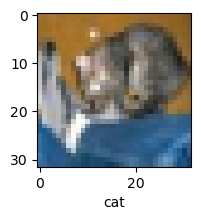

In [301]:
plot_sample(X_test,Y_test,0)